## Weather Data Analysis

In this project, [we will analyse earth surface temperature data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data).

In this dataset, every row represents a monthly data point. Our analysis will specifically focus on analyzing the average temperatures for the specified cities.

In [1]:
# import required modules

#python data science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#scientific computing module of scipy
import scipy as sci
import scipy.stats as stats
import seaborn as sns

First, we will first import tabular data from `csv` file to `pandas.DataFrame`.

In [2]:
# import data
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

We can view the first five rows of our dataset using the `pandas.head()` method.

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


As observed, there are `NaN` values in the dataframe. To ensure accuracy, we will conduct further checks.

In [4]:
# check if there is null in dataframe
df.isnull().values.any()

True

We will proceed to eliminate all rows containing `NaN` values and reset the index accordingly.

In [5]:
df = df.dropna(axis=0).reset_index(drop=True)

To ensure absolute certainty, we will perform another check to verify if there are still any `NaN` values remaining in our dataset.

In [6]:
df.isnull().values.any()

False

Having confirmed that there are no more `NaN` values in our dataset, we can now determine the new number of datapoints and features using the `pandas.shape` attribute.

In [7]:
# shape of new dataframe
df.shape

(8235082, 7)

We have **8599212** datapoints for **7** features.

We will primarily analyze data from three cities: **Berlin**, **Madrid**, and **Spain**. To accomplish this, we will create sub-dataframes for each city.

In [8]:
df_berlin = df[df['City'] == 'Berlin'].reset_index(drop=True)
df_madrid = df[df['City'] == 'Madrid'].reset_index(drop=True)
df_paris = df[df['City'] == 'Paris'].reset_index(drop=True)

In [9]:
print('Berlin dataframe shape: ', df_berlin.shape)
print('Madrid dataframe shape: ', df_madrid.shape)
print('Paris dataframe shape: ', df_paris.shape)

Berlin dataframe shape:  (3166, 7)
Madrid dataframe shape:  (3166, 7)
Paris dataframe shape:  (3166, 7)


The sub-dataframes appear to be good. Let's now check one of them:

In [10]:
df_berlin.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.326,1.601,Berlin,Germany,52.24N,13.14E
1,1744-04-01,9.536,2.761,Berlin,Germany,52.24N,13.14E
2,1744-05-01,12.579,1.223,Berlin,Germany,52.24N,13.14E
3,1744-06-01,14.809,1.398,Berlin,Germany,52.24N,13.14E
4,1744-07-01,17.275,1.348,Berlin,Germany,52.24N,13.14E


Using `pandas.describe()` we can view some basic statistical details:

In [11]:
# Let's create a simple dataframe which contains only average temperature of three cities

df_describe = pd.DataFrame()
df_describe['Berlin-AvgTemp'] = df_berlin['AverageTemperature']
df_describe['Madrid-AvgTemp'] = df_madrid['AverageTemperature']
df_describe['Paris-AvgTemp'] = df_paris['AverageTemperature']

df_describe.describe()

,Berlin-AvgTemp,Madrid-AvgTemp,Paris-AvgTemp
count,3166.000000,3166.000000,3166.000000
mean,8.916234,11.448704,10.402644
std,7.255932,6.561506,5.904355
min,-10.125000,-0.918000,-3.876000
25%,2.662500,5.675250,5.316000
50%,8.802000,10.475000,10.117500
75%,15.663750,17.502000,15.951000
max,23.795000,24.771000,23.264000


## Moving Averages

Using moving averages helps smooth out short-term fluctuations in weather data, making it easier to spot long-term trends. This is especially valuable when studying climate change patterns or gradual shifts in weather conditions over longer timeframes.

Here we will look at 5-Year, 10-Year and 20-Year moving averages

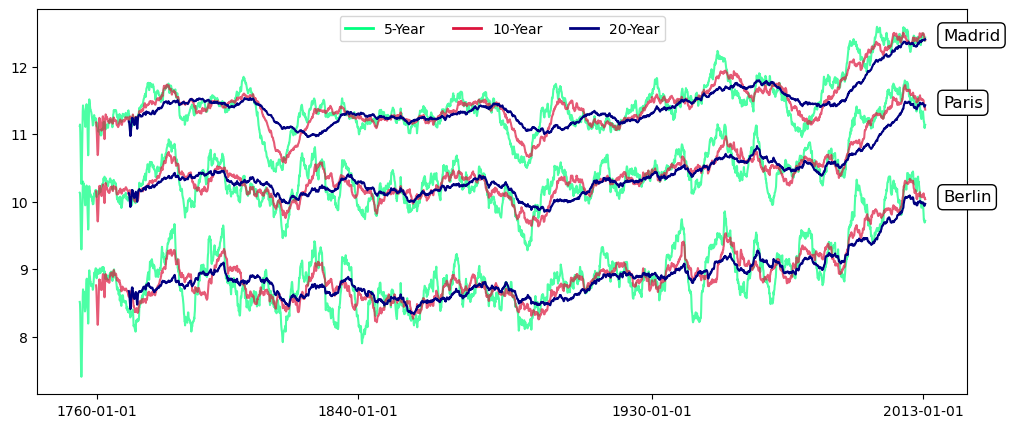

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

for i in [df_berlin, df_madrid, df_paris]:
    ax1.plot(i['dt'], i['AverageTemperature'].rolling(60).mean(),
         alpha=0.7,color='springgreen')
    ax1.plot(i['dt'], i['AverageTemperature'].rolling(120).mean(),
         alpha=0.7,color='crimson')
    ax1.plot(i['dt'], i['AverageTemperature'].rolling(240).mean(),
        color='navy')
    
legend = [
    plt.Line2D([0], [0], color='springgreen', lw=2, label='5-Year'),
    plt.Line2D([0], [0], color='crimson', lw=2, label='10-Year'),
    plt.Line2D([0], [0], color='navy', lw=2, label='20-Year')
]

_ = ax1.legend(handles=legend, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    
 
_ = ax1.set_xticks(['1760-01-01', '1840-01-01', '1930-01-01', '2013-01-01'])

bbox_props = dict(boxstyle='round,pad=0.3', facecolor='white', alpha=1)
_ = ax1.text(3230, 10, 'Berlin', bbox=bbox_props, fontsize=12)
_ = ax1.text(3230, 11.4, 'Paris', bbox=bbox_props, fontsize=12)
_ = ax1.text(3230, 12.4, 'Madrid', bbox=bbox_props, fontsize=12)   


The average temperatures for each city exhibit significant fluctuations, but there is a clear overall increasing trend of approximately 1.5°C over the past 270 years. Particularly, after 1980, there is a sharp rise in average temperatures, which could be indicative of human influence on the climate. This is likely attributed to greenhouse gas emissions, especially $CO_2$, contributing to the warming effect on average temperatures.

To gain better insight, we plot the percentage change in average temperature over time using 20-year averages.

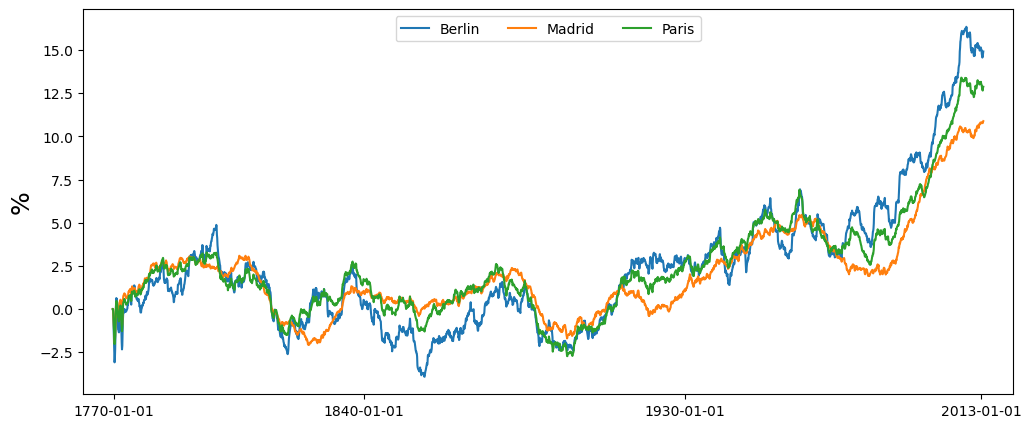

In [13]:
df_berlin['20-Year'] = df_berlin['AverageTemperature'].rolling(240).mean()
df_madrid['20-Year'] = df_madrid['AverageTemperature'].rolling(240).mean()
df_paris['20-Year'] = df_paris['AverageTemperature'].rolling(240).mean()

df_berlin = df_berlin.dropna(axis=0).reset_index(drop=True)
df_madrid = df_madrid.dropna(axis=0).reset_index(drop=True)
df_paris = df_paris.dropna(axis=0).reset_index(drop=True)


fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

ax1.plot(df_berlin['dt'], (df_berlin['20-Year'] - df_berlin['20-Year'][0]) / df_berlin['20-Year'][0] * 100,
        label='Berlin')
ax1.plot(df_madrid['dt'], (df_madrid['20-Year'] - df_madrid['20-Year'][0]) / df_madrid['20-Year'][0] * 100,
        label='Madrid')
ax1.plot(df_paris['dt'], (df_paris['20-Year'] - df_paris['20-Year'][0]) / df_paris['20-Year'][0] * 100,
        label='Paris')

_ = ax1.set_xticks(['1770-01-01', '1840-01-01', '1930-01-01', '2013-01-01'])
_ = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
_ = ax1.set_xlim(-100, df_berlin.index[-1]+100)
_ = ax1.set_ylabel('%', fontsize=18)

Upon examination, it becomes evident that Berlin experienced an approximate 15% increase
in average temperature, while Paris saw a rise of about 12.5%, and Madrid observed an increase
of around 10% over the given period.

Furthermore, from the figure, it is evident that there is a similarity in the pattern of average temperatures among corresponding cities over the specified period. Consequently, we can anticipate a strong linear correlation between the average temperatures of these cities. To demonstrate this, we can utilize `seaborn.jointplot` to visualize the relationship between two of the cities. Here, we display the linear relationship between average temperatures of Berlin and Madrid. However, we can also expect similar relationships between other city combinations.

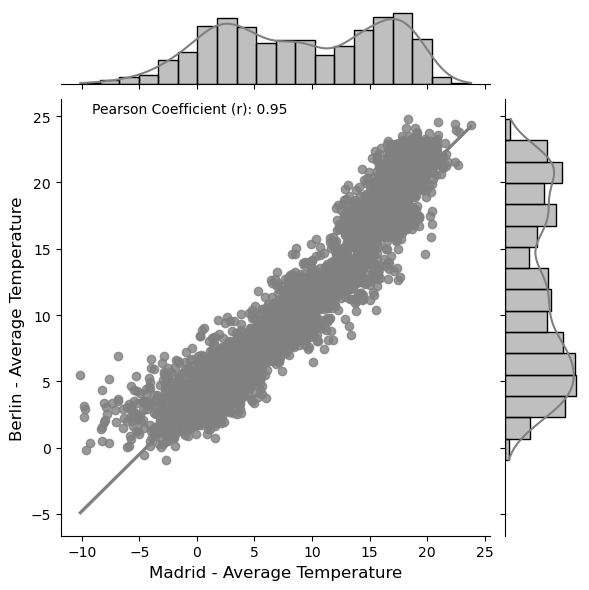

In [14]:
df_combined = df[(df['City'] == 'Berlin') | (df['City'] == 'Paris') |
              (df['City'] == 'Madrid')].reset_index(drop=True)

_ = sns.jointplot(x=df_combined[df_combined['City'] == 'Berlin']['AverageTemperature'].reset_index(drop=True),
              y=df_combined[df_combined['City'] == 'Madrid']['AverageTemperature'].reset_index(drop=True),
              data = df_combined, kind="reg", color='gray')

r, p = stats.pearsonr(df_combined[df_combined['City'] == 'Berlin']['AverageTemperature'].reset_index(drop=True),
                      df_combined[df_combined['City'] == 'Madrid']['AverageTemperature'].reset_index(drop=True))
text = f"Pearson Coefficient (r): {r:.2f}"
_ = _.ax_joint.annotate(text, xy=(0.30, 0.97), xycoords='axes fraction', ha='center', fontsize=10)

_ = plt.xlabel('Madrid - Average Temperature',fontsize=12)
_ = plt.ylabel('Berlin - Average Temperature',fontsize=12)

As we stated earlier, the correlation coefficient of r=0.95 indicates a strong similarity in the average temperatures of Berlin and Madrid over the specified period.